In [1]:
import requests
res = requests.get('https://tw.stock.yahoo.com/_td-stock/api/resource/FinanceChartService.ApacLibraCharts;symbols=%5B%222330.TW%22%5D;type=tick?bkt=%5B%22tw-qsp-exp-no2-1%22%2C%22test-es-module-production%22%2C%22test-portfolio-stream%22%5D&device=desktop&ecma=modern&feature=ecmaModern%2CshowPortfolioStream&intl=tw&lang=zh-Hant-TW&partner=none&prid=2h3pnulg7tklc&region=TW&site=finance&tz=Asia%2FTaipei&ver=1.2.902&returnMeta=true')
res

<Response [200]>

In [3]:
jd = res.json()['data']

In [10]:
close = jd[0]['chart']['indicators']['quote'][0]['close']

In [14]:
timestamp = jd[0]['chart']['timestamp']

In [15]:
import pandas
df = pandas.DataFrame({'timestamp': timestamp, 'close':close})

In [16]:
df.head()

,timestamp,close
0,1618880460,596
1,1618880520,596
2,1618880580,597
3,1618880640,596
4,1618880700,597


In [19]:
df['dt'] = pandas.to_datetime(df['timestamp'] + 3600 * 8, unit = 's')

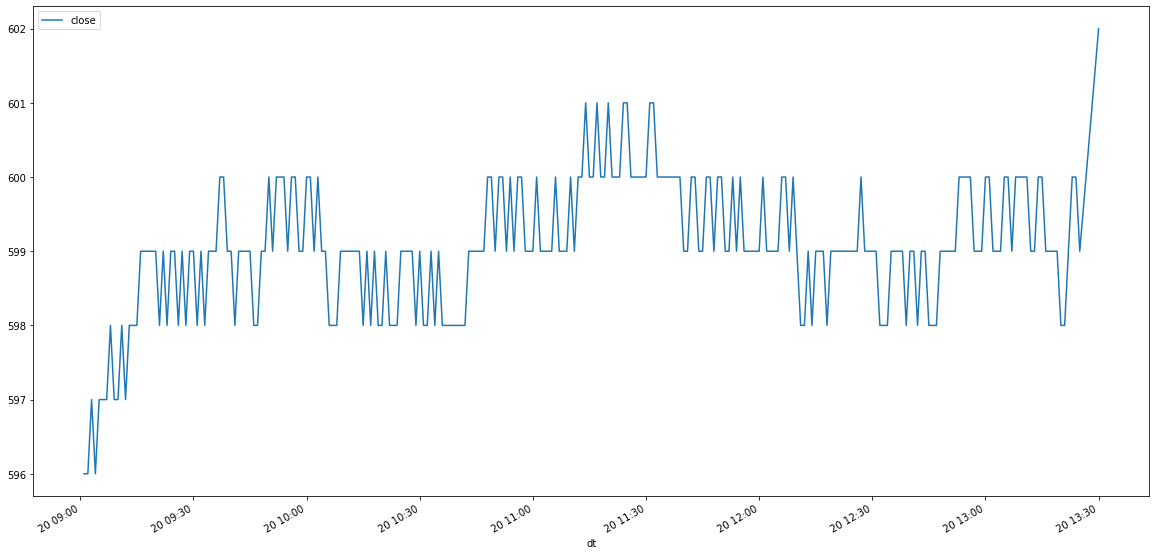

In [21]:
df.plot('dt', 'close', figsize = [20,10])